- Among all algorithms, PPO2 from stable baselines has shown the best performance
- Setting w = 0.05 has better performance than w = 0.1, with respect to the value of objective function, but less robustness (sometimes we can not find a solution within 200 steps), later we can investigate how to optimize hyperparams, including w, history_num, observation_space etc.

In [ ]:
### install stable-baseline3 package ###
!pip install stable-baselines
!pip install stable-baselines3[extra]
!apt-get install ffmpeg freeglut3-dev xvfb

In [ ]:
# install tensorflow
!pip install tensorflow==1.15.0

In [ ]:
# upload
from google.colab import files
src = list(files.upload().values())[0]
open('env.py','wb').write(src)

src = list(files.upload().values())[0]
open('objective_function.py','wb').write(src)

src = list(files.upload().values())[0]
open('gradient_descent.py','wb').write(src)

In [37]:
# import
import gym
import torch
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage


from gym import spaces
from stable_baselines import PPO2,TD3,A2C,DQN
from stable_baselines3 import PPO, SAC # DQN coming soon
from stable_baselines3.common.cmd_util import make_vec_env
from stable_baselines3.common.env_checker import check_env
from Env import *
from objective_function import *
from gradient_descent import *

In [98]:

## all input of robot environment ##
pos = np.array([[10,10],[40,50],[15,35]])
size = np.array([[20,20],[10,30],[20,30]])
bound = np.array([64,64])
start = np.array([0.1,0.1])
end = np.array([6.3,6.3])
opt_num = 5
sp_num = 5
co_num = 20
w = 0.05
environment = Environment(pos,size,bound)
obj = Objective(start, end, opt_num, sp_num, co_num, environment, w)

### reinforcement demo -- training ###
env = MPEnv(obj)
check_env(env, warn=True)
model = PPO2('MlpPolicy', env, gamma=1, verbose=1).learn(10000)


/usr/local/lib/python3.6/dist-packages/stable_baselines3/common/env_checker.py:232: UserWarning: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) cf https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  "We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) "


Wrapping the env in a DummyVecEnv.
--------------------------------------
| approxkl           | 0.00031677133 |
| clipfrac           | 0.0           |
| explained_variance | 0.00429       |
| fps                | 105           |
| n_updates          | 1             |
| policy_entropy     | 14.186996     |
| policy_loss        | -0.010967921  |
| serial_timesteps   | 128           |
| time_elapsed       | 1.79e-05      |
| total_timesteps    | 128           |
| value_loss         | 7566.5176     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00020889447 |
| clipfrac           | 0.0           |
| explained_variance | 0.00711       |
| fps                | 123           |
| n_updates          | 2             |
| policy_entropy     | 14.180495     |
| policy_loss        | -0.0049862843 |
| serial_timesteps   | 256           |
| time_elapsed       | 1.21          |
| total_timesteps    | 256           |
| value_loss         | 8172.8

True
cost= 0.9103132635298872
[[ 0.5         0.5       ]
 [19.95168673  4.84446604]
 [36.73257155  6.35666096]
 [42.68395722 18.88707801]
 [48.08846442 31.08080716]
 [53.383517   43.18584323]
 [62.5        62.5       ]]


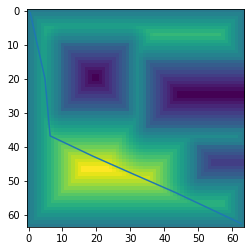

In [99]:
## all input of robot environment ## 
pos = np.array([[10,10],[40,50],[15,35]])
size = np.array([[20,20],[10,30],[20,30]])
bound = np.array([64,64])
start = np.array([0.1,0.1])
end = np.array([6.3,6.3])
opt_num = 5
sp_num = 5
co_num = 20
w = 0.05
environment = Environment(pos,size,bound)
obj = Objective(start, end, opt_num, sp_num, co_num, environment, w)
ob_fun = obj.ob_fun
ob_der_fun = obj.ob_der_fun
## all input of robot environment ##


## gradient descent ##
iter_num = 200
lr = 0.2
x0 = obj.initial()

for i in range(iter_num):
    x0 = x0 - lr * ob_der_fun(x0)
    # print(x0) # 
b = environment.dis
plt.imshow(b)
print(obj.collision(x0))
print("cost=",obj.ob_fun(x0))
x0 = np.insert(x0, (0, x0.shape[0]), (start, end), axis=0)
x0 = x0*10-0.5
print(x0)
plt.plot(x0[:,1],x0[:,0])
## gradient descent ##

initial cost= 1.116905685215933
initial location [[1.13333333 1.13333333]
 [2.16666667 2.16666667]
 [3.2        3.2       ]
 [4.23333333 4.23333333]
 [5.26666667 5.26666667]]
step= 0 False 1.0595274278153597
step= 1 False 1.1020443802522462
step= 2 False 1.211955295137567
step= 3 False 1.2592909077068133
step= 4 False 1.286636974337645
step= 5 False 1.2952178772360061
step= 6 False 1.285230065791923
step= 7 False 1.2598628902710627
step= 8 False 1.2300827682934081
step= 9 False 1.2063910813526846
step= 10 False 1.1885317787810947
step= 11 False 1.1763700141390716
step= 12 True 1.167742403948866
step= 13 True 1.1618112839316999
step= 14 True 1.1572802333443513
step= 15 True 1.1521947165627628
step= 16 True 1.1473109465784512
step= 17 True 1.1426582088710948
step= 18 True 1.1386545414771556
step= 19 True 1.1352748716112464
step= 20 True 1.133029584673801
step= 21 True 1.1316343682754497
step= 22 True 1.1308272379430342
step= 23 True 1.13034903350547
step= 24 True 1.1299524127330467
step=

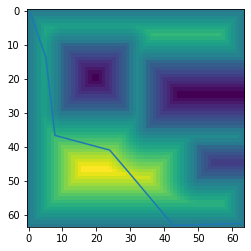

In [100]:
### reinforcement learning demo -- test ###
obs = env.reset()
# env.pos = 6.4*np.random.rand(env.obj.opt_num,2)    # this two lines enables different initialization at test time
# obs = env.obj.ob_der_fun(env.pos).flatten()        # this two lines enables different initialization at test time
print("initial cost=",env.obj.ob_fun(env.pos))
print("initial location",env.pos)
n_steps = 200
max_reward = float("-inf") 
reward_list = []
step_list = []
pos_list = []
paths = []
for step in range(n_steps):
  action, _ = model.predict(obs, deterministic=True)
  obs, reward, done, info = env.step(action)
  print("step=",step,env.obj.collision(env.pos),env.obj.ob_fun(env.pos))
  if done:
    if reward > max_reward:
      max_reward = reward
      reward_list.append(max_reward)
      step_list.append(step)
      pos_list.append(env.pos)
i = reward_list.index(max(reward_list))
reward = reward_list[i]
step = step_list[i]
print("Goal reached!", "reward=", reward,"step=",step)
x = pos_list[i]
x = np.insert(x, (0, x.shape[0]), (start, end), axis=0)
plt.imshow(environment.dis)
x_rescale = x*10-0.5
print(x_rescale)
plt.plot(x_rescale.T[1],x_rescale.T[0])

initial cost= 8.030683648221094
initial location [[3.76639699 2.9531518 ]
 [2.96171303 5.54559063]
 [6.19142794 0.01776516]
 [2.00646587 4.35354856]
 [0.03892561 4.7725161 ]]
step= 0 False 7.273296634669344
step= 1 False 6.648796408136789
step= 2 False 6.129462011969821
step= 3 False 5.702829825961971
step= 4 False 5.355555632631963
step= 5 False 5.071160661376922
step= 6 False 4.847280203304254
step= 7 False 4.721300746012223
step= 8 False 4.6072486973723255
step= 9 False 4.539260100356581
step= 10 False 4.430628454248318
step= 11 False 4.321369817497629
step= 12 False 4.230658058458863
step= 13 False 4.123546661975096
step= 14 False 4.039033911296908
step= 15 False 4.001216873595703
step= 16 False 3.868639250470485
step= 17 False 3.652095539034591
step= 18 False 3.3892618369868712
step= 19 False 3.213841751007519
step= 20 False 3.1015756611335
step= 21 False 2.9981311215191138
step= 22 False 2.9393747695915375
step= 23 False 2.8770988925513064
step= 24 False 2.7430481898168173
step= 

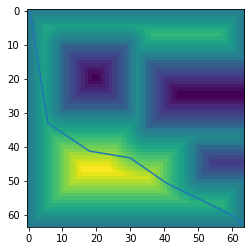

In [101]:
### reinforcement learning demo -- test ###
# obs = env.reset()
env.pos = 6.4*np.random.rand(env.obj.opt_num,2)    # this two lines enables different initialization at test time 
obs = env.obj.ob_der_fun(env.pos).flatten()        # this two lines enables different initialization at test time 
print("initial cost=",env.obj.ob_fun(env.pos))
print("initial location",env.pos)
n_steps = 200

max_reward = float("-inf") 
reward_list = []
step_list = []
pos_list = []
paths = []
for step in range(n_steps):
  action, _ = model.predict(obs, deterministic=True)
  obs, reward, done, info = env.step(action)
  print("step=",step,env.obj.collision(env.pos),env.obj.ob_fun(env.pos))
  if done:
    if reward > max_reward:
      max_reward = reward
      reward_list.append(max_reward)
      step_list.append(step)
      pos_list.append(env.pos)
i = reward_list.index(max(reward_list))
reward = reward_list[i]
step = step_list[i]
print("Goal reached!", "reward=", reward,"step=",step)
x = pos_list[i]
x = np.insert(x, (0, x.shape[0]), (start, end), axis=0)
plt.imshow(environment.dis)
x_rescale = x*10-0.5
print(x_rescale)
plt.plot(x_rescale.T[1],x_rescale.T[0])


True
cost= 1.0273943253640572
[[ 0.5         0.5       ]
 [ 4.79067754 21.08980051]
 [ 6.99954527 37.53448959]
 [22.39621939 39.40567317]
 [37.31308661 39.33685501]
 [51.70233135 42.44654578]
 [62.5        62.5       ]]


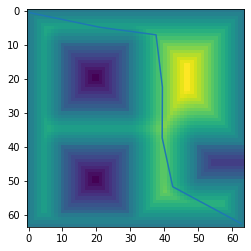

In [111]:
## all input of robot environment ## 
pos = np.array([[10,10],[40,50],[40,10]])
size = np.array([[20,20],[10,30],[20,20]])
bound = np.array([64,64])
start = np.array([0.1,0.1])
end = np.array([6.3,6.3])
opt_num = 5
sp_num = 5
co_num = 20
w = 0.05
environment = Environment(pos,size,bound)
obj = Objective(start, end, opt_num, sp_num, co_num, environment, w)
ob_fun = obj.ob_fun
ob_der_fun = obj.ob_der_fun
## all input of robot environment ##


## gradient descent ##
iter_num = 200
lr = 0.2
x0 = obj.initial()

for i in range(iter_num):
    x0 = x0 - lr * ob_der_fun(x0)
    # print(x0) # 
b = environment.dis
plt.imshow(b)
print(obj.collision(x0))
print("cost=",obj.ob_fun(x0))
x0 = np.insert(x0, (0, x0.shape[0]), (start, end), axis=0)
x0 = x0*10-0.5
print(x0)
plt.plot(x0[:,1],x0[:,0])
## gradient descent ##

In [112]:
### reinforcement demo -- training ###
env = MPEnv(obj)
check_env(env, warn=True)
model = PPO2('MlpPolicy', env, gamma=1, verbose=1).learn(10000)


/usr/local/lib/python3.6/dist-packages/stable_baselines3/common/env_checker.py:232: UserWarning: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) cf https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  "We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) "


Wrapping the env in a DummyVecEnv.
-------------------------------------
| approxkl           | 0.0005424271 |
| clipfrac           | 0.0          |
| explained_variance | 0.0126       |
| fps                | 109          |
| n_updates          | 1            |
| policy_entropy     | 14.191303    |
| policy_loss        | -0.01645568  |
| serial_timesteps   | 128          |
| time_elapsed       | 1.6e-05      |
| total_timesteps    | 128          |
| value_loss         | 6747.9927    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00017988909 |
| clipfrac           | 0.0           |
| explained_variance | -0.00254      |
| fps                | 138           |
| n_updates          | 2             |
| policy_entropy     | 14.193022     |
| policy_loss        | -0.0014679655 |
| serial_timesteps   | 256           |
| time_elapsed       | 1.17          |
| total_timesteps    | 256           |
| value_loss         | 9685.851      |
---

In [113]:
### reinforcement learning demo -- test ###
obs = env.reset()
# env.pos = 6.4*np.random.rand(env.obj.opt_num,2)    # this two lines enables different initialization at test time
# obs = env.obj.ob_der_fun(env.pos).flatten()        # this two lines enables different initialization at test time
print("initial cost=",env.obj.ob_fun(env.pos))
print("initial location",env.pos)
n_steps = 200
max_reward = float("-inf") 
reward_list = []
step_list = []
pos_list = []
paths = []
for step in range(n_steps):
  action, _ = model.predict(obs, deterministic=True)
  obs, reward, done, info = env.step(action)
  print("step=",step,env.obj.collision(env.pos),env.obj.ob_fun(env.pos))
  if done:
    if reward > max_reward:
      max_reward = reward
      reward_list.append(max_reward)
      step_list.append(step)
      pos_list.append(env.pos)
i = reward_list.index(max(reward_list))
reward = reward_list[i]
step = step_list[i]
print("Goal reached!", "reward=", reward,"step=",step)
x = pos_list[i]
x = np.insert(x, (0, x.shape[0]), (start, end), axis=0)
plt.imshow(environment.dis)
x_rescale = x*10-0.5
print(x_rescale)
plt.plot(x_rescale.T[1],x_rescale.T[0])

initial cost= 1.0834753564189392
initial location [[1.13333333 1.13333333]
 [2.16666667 2.16666667]
 [3.2        3.2       ]
 [4.23333333 4.23333333]
 [5.26666667 5.26666667]]
step= 0 False 1.0638557750765596
step= 1 False 1.0748724678513821
step= 2 False 1.0793035751805535
step= 3 False 1.0828346280400916
step= 4 False 1.0873133879252763
step= 5 False 1.0958459469476094
step= 6 False 1.1116814654573044
step= 7 False 1.1372296008438814
step= 8 False 1.1714884147257734
step= 9 False 1.2149105061913428
step= 10 False 1.2625080848041486
step= 11 False 1.3087676637953545
step= 12 False 1.348972869460382
step= 13 False 1.3714186573524703
step= 14 False 1.3822158394458948
step= 15 False 1.4031593615151223
step= 16 False 1.4206966828966545
step= 17 False 1.4334867780959346
step= 18 False 1.4533400689106761
step= 19 False 1.4358184084437426
step= 20 False 1.430807068318467
step= 21 False 1.4341645361852837
step= 22 False 1.4235153438338393
step= 23 False 1.411935117166704
step= 24 False 1.4014

ValueError: ignored

initial cost= 11.089293340268062
initial location [[5.71430497 2.12467075]
 [5.25586639 0.2668584 ]
 [0.68900275 3.80833321]
 [3.39083112 2.68036754]
 [2.14661024 3.98412437]]
step= 0 False 9.390683446508854
step= 1 False 7.918707604373074
step= 2 False 6.699251216329232
step= 3 False 5.805465395615463
step= 4 False 5.22365127162545
step= 5 False 4.897935877828811
step= 6 False 4.739963186357755
step= 7 False 4.645900505856269
step= 8 False 4.572998120269916
step= 9 False 4.504414465682653
step= 10 False 4.44639155138267
step= 11 False 4.390707520143285
step= 12 False 4.322698874880544
step= 13 False 4.251148224141652
step= 14 False 4.182617977458265
step= 15 False 4.1183740569714455
step= 16 False 4.056691996019721
step= 17 False 3.9973402359638444
step= 18 False 3.941495244039258
step= 19 False 3.888130864902874
step= 20 False 3.8385026077054585
step= 21 False 3.7910402542103068
step= 22 False 3.7434873380170606
step= 23 False 3.696210260117173
step= 24 False 3.6511155223383063
step=

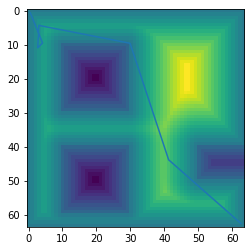

In [110]:
### reinforcement learning demo -- test ###
# obs = env.reset()
np.random.seed(6)
env.pos = 6.4*np.random.rand(env.obj.opt_num,2)    # this two lines enables different initialization at test time
obs = env.obj.ob_der_fun(env.pos).flatten()        # this two lines enables different initialization at test time
print("initial cost=",env.obj.ob_fun(env.pos))
print("initial location",env.pos)
n_steps = 200
max_reward = float("-inf") 
reward_list = []
step_list = []
pos_list = []
paths = []
for step in range(n_steps):
  action, _ = model.predict(obs, deterministic=True)
  obs, reward, done, info = env.step(action)
  print("step=",step,env.obj.collision(env.pos),env.obj.ob_fun(env.pos))
  if done:
    if reward > max_reward:
      max_reward = reward
      reward_list.append(max_reward)
      step_list.append(step)
      pos_list.append(env.pos)
i = reward_list.index(max(reward_list))
reward = reward_list[i]
step = step_list[i]
print("Goal reached!", "reward=", reward,"step=",step)
x = pos_list[i]
x = np.insert(x, (0, x.shape[0]), (start, end), axis=0)
plt.imshow(environment.dis)
x_rescale = x*10-0.5
print(x_rescale)
plt.plot(x_rescale.T[1],x_rescale.T[0])